## Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

One way to define the data science process is as follows:

1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Research from psychology and education indicates that in most cases, children with a left-sided profile have difficulties in mastering oral and written language skills, numeracy and mathematical operations. A characteristic feature of left-handers is the insufficient and specific development of visual perception, which normally creates the basis for mastering reading and writing.


---
## Step 2: Obtain the data.

### Read in the file titled "data.csv":
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [4]:
# library imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression, Lasso, Ridge
from sklearn.metrics import confusion_matrix

In [5]:
df = pd.read_table('data.csv')

---

## Step 3: Explore the data.

### Conduct background research:

Domain knowledge is irreplaceable. Figuring out what information is relevant to a problem, or what data would be useful to gather, is a major part of any end-to-end data science project! For this lab, you'll be using a dataset that someone else has put together, rather than collecting the data yourself.

Do some background research about personality and handedness. What features, if any, are likely to help you make good predictions? How well do you think you'll be able to model this? Write a few bullet points summarizing what you believe, and remember to cite external sources.

You don't have to be exhaustive here. Do enough research to form an opinion, and then move on.

> You'll be using the answers to Q1-Q44 for modeling; you can disregard other features, e.g. country, age, internet browser.

### Conduct exploratory data analysis on this dataset:

If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

You might use this section to perform data cleaning if you find it to be necessary.

In [9]:
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4184 entries, 0 to 4183
Data columns (total 56 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Q1           4184 non-null   int64 
 1   Q2           4184 non-null   int64 
 2   Q3           4184 non-null   int64 
 3   Q4           4184 non-null   int64 
 4   Q5           4184 non-null   int64 
 5   Q6           4184 non-null   int64 
 6   Q7           4184 non-null   int64 
 7   Q8           4184 non-null   int64 
 8   Q9           4184 non-null   int64 
 9   Q10          4184 non-null   int64 
 10  Q11          4184 non-null   int64 
 11  Q12          4184 non-null   int64 
 12  Q13          4184 non-null   int64 
 13  Q14          4184 non-null   int64 
 14  Q15          4184 non-null   int64 
 15  Q16          4184 non-null   int64 
 16  Q17          4184 non-null   int64 
 17  Q18          4184 non-null   int64 
 18  Q19          4184 non-null   int64 
 19  Q20          4184 non-null 

In [11]:
df.isnull().sum()

Q1             0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
Q27            0
Q28            0
Q29            0
Q30            0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q42            0
Q43            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
religion       0
hand           0
dtype: int64

In [12]:
# Drop unrelated columns
df.drop(columns=['introelapse','testelapse','country','fromgoogle','engnat',\
                 'age','education','gender','orientation','race','religion'],axis=1,inplace=True)

In [13]:
df['hand'].value_counts()

hand
1    3542
2     452
3     179
0      11
Name: count, dtype: int64

In [14]:
# Drop row with hand = 0
df.drop(df[df['hand'] == 0].index , inplace=True)

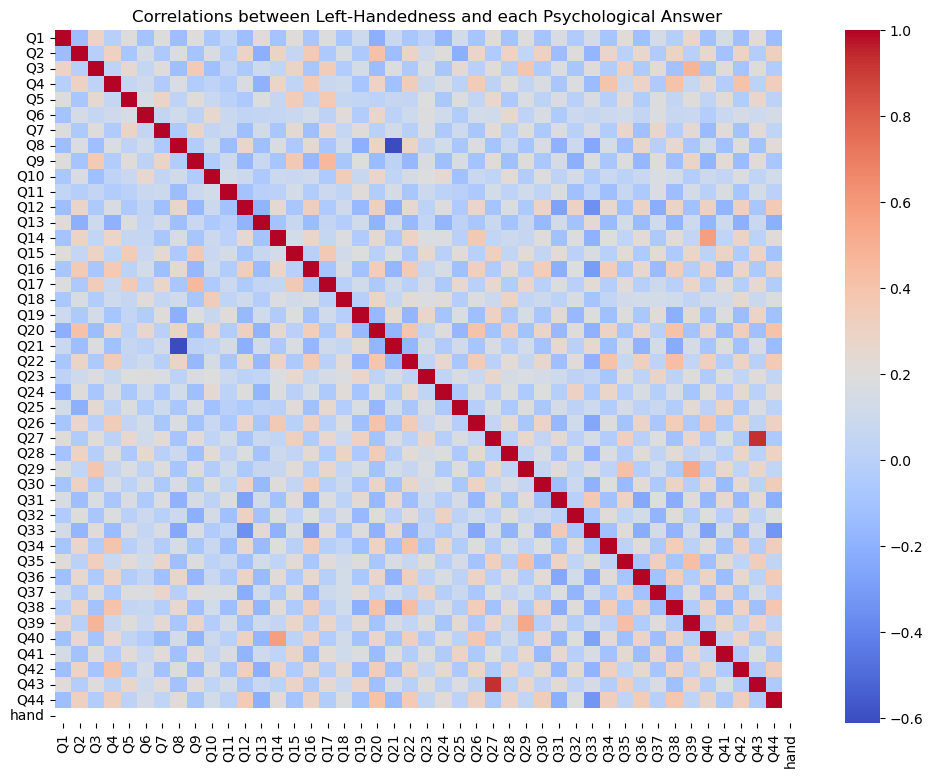

In [15]:
# Correlation focusing on Left-Handedness = 2
plt.figure(figsize=(12,9))
corr = df[df['hand'] == 2].corr().sort_values('hand', ascending=False)
sns.heatmap(corr, cmap='coolwarm')
plt.title("Correlations between Left-Handedness and each Psychological Answer")
plt.show()

In [16]:
# Q8	I know the birthdays of my friends.
# Q21	I do not remember birthdays.
# These two are questions about birthday.

In [17]:
# Q27	I think a natural disaster would be kind of exciting.
# Q43	I think a natural disaster would be kind of exciting.
# These two are the same questions

### Calculate and interpret the baseline accuracy rate:

In [19]:
round(df['hand'].value_counts(normalize=True)*100, 2)

# Our majority class is right hand with about 84.90 percent. 
# Then, baseline accuracy rate is about 84.90 percent.

hand
1    84.88
2    10.83
3     4.29
Name: proportion, dtype: float64

### Short answer questions:

In this lab, you'll use K-nearest neighbors and logistic regression to model handedness based on psychological factors. 

Answer the following related questions; your answers may be in bullet points.

#### Describe the difference between regression and classification problems:

The main difference between Regression and Classification algorithms that Regression algorithms are used to predict the continuous values and Classification algorithms are used to predict/Classify the discrete values.

#### Considering $k$-nearest neighbors, describe the relationship between $k$ and the bias-variance tradeoff:

Higher value of k will leads to higher bias and lower variance.

#### Why do we often standardize predictor variables when using $k$-nearest neighbors?

As k-nearest neighbors is a distance-based classifier that classifies new observations based on similar measures. Standardization makes all variables contribute equally to the similarity measures.

#### Do you think we should standardize the explanatory variables for this problem? Why or why not?

It is unnecessary to standardize the explanatory variables for this problem, 
since each variable has a similar scale.

#### How do we settle on $k$ for a $k$-nearest neighbors model?

k in the model can be changed by hand; however, there are two easier options which are cross validation and gridSearch.

#### What is the default type of regularization for logistic regression as implemented in scikit-learn? (You might [check the documentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html).)

In [ ]:
# penalty : {'l1', 'l2', 'elasticnet', None}, default='l2'
#     Specify the norm of the penalty:

#     - `None`: no penalty is added;
#     - `'l2'`: add a L2 penalty term and it is the default choice;
#     - `'l1'`: add a L1 penalty term;
#     - `'elasticnet'`: both L1 and L2 penalty terms are added.

Default is l2 which is Ridge Regulization.

#### Describe the relationship between the scikit-learn `LogisticRegression` argument `C` and regularization strength:

In [ ]:
# C : float, default=1.0 
#     Inverse of regularization strength; must be a positive float.
#     Like in support vector machines, smaller values specify stronger regularization.

#### Describe the relationship between regularization strength and the bias-variance tradeoff:

As the regularization strength increase, variance will be lower and bias will be higher.

#### Logistic regression is considered more interpretable than $k$-nearest neighbors. Explain why.

Logistic regression is considered more interpretable. Since the logistic regression is the Paramatic model in which provide coefficient of each features.Coefficient explain the direction and intensity of significance of the independent variables over the dependent variable. <br> On the opposite k-nearest neighbors is non parametic model which it is unable to findthe impact of features on the target.

---

## Step 4 & 5 Modeling: $k$-nearest neighbors

### Train-test split your data:

Your features should be:

In [39]:
X = df.drop(columns='hand')
y = df[['hand']]

In [40]:
# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify=y,random_state=42)

In [41]:
# summarize the shape of the train and test sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((3129, 44), (1044, 44), (3129, 1), (1044, 1))

#### Create and fit four separate $k$-nearest neighbors models: 
- one with $k = 3$
- one with $k = 5$
- one with $k = 15$
- one with $k = 25$:

In [43]:
# k = 3
knn_3 = KNeighborsClassifier(n_neighbors=3)
knn_3.fit(X_train, y_train.values.ravel())
y_pred = knn_3.predict(X_test)

In [44]:
# k = 5
knn_5 = KNeighborsClassifier(n_neighbors=5)
knn_5.fit(X_train, y_train.values.ravel())
y_pred = knn_5.predict(X_test)

In [45]:
# k = 15
knn_15 = KNeighborsClassifier(n_neighbors=15)
knn_15.fit(X_train, y_train.values.ravel())
y_pred = knn_15.predict(X_test)

In [46]:
# k = 20
knn_20 = KNeighborsClassifier(n_neighbors=20)
knn_20.fit(X_train, y_train.values.ravel())
y_pred = knn_20.predict(X_test)

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

In [48]:
print("k = 3")
print(f"Cross Validation Score :{cross_val_score(knn_3, X, y.values.ravel(), cv=5).mean():.4f}")
print(f"Train Score: {knn_3.score(X_train, y_train):.4f}")
print(f"Test Score: {knn_3.score(X_test, y_test):.4f}")

k = 3
Cross Validation Score :0.8092
Train Score: 0.8651
Test Score: 0.8170


In [49]:
print("k = 5")
print(f"Cross Validation Score :{cross_val_score(knn_5, X, y.values.ravel(), cv=5).mean():.4f}")
print(f"Train Score: {knn_5.score(X_train, y_train):.4f}")
print(f"Test Score: {knn_5.score(X_test, y_test):.4f}")

k = 5
Cross Validation Score :0.8346
Train Score: 0.8527
Test Score: 0.8496


In [50]:
print("k = 15")
print(f"Cross Validation Score :{cross_val_score(knn_15, X, y.values.ravel(), cv=5).mean():.4f}")
print(f"Train Score: {knn_15.score(X_train, y_train):.4f}")
print(f"Test Score: {knn_15.score(X_test, y_test):.4f}")

k = 15
Cross Validation Score :0.8486
Train Score: 0.8488
Test Score: 0.8487


In [51]:
print("k = 20")
print(f"Cross Validation Score :{cross_val_score(knn_20, X, y.values.ravel(), cv=5).mean():.4f}")
print(f"Train Score: {knn_20.score(X_train, y_train):.4f}")
print(f"Test Score: {knn_20.score(X_test, y_test):.4f}")

k = 20
Cross Validation Score :0.8488
Train Score: 0.8488
Test Score: 0.8487


In [52]:
# No model beats the baseline.

---

## Step 4 & 5 Modeling: logistic regression

#### Create and fit four separate logistic regression models: one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

Note: You can use the same train and test data as used above with kNN.

In [54]:
# Lasso alpha 1 
ls_1 = LogisticRegression(penalty='l1', solver='liblinear',C=1.0)
ls_1.fit(X_train, y_train.values.ravel())
y_ls_1_predict = ls_1.predict(X_test)

# Lasso alpha 10
ls_10 = LogisticRegression(penalty='l1', solver='liblinear',C=10.0)
ls_10.fit(X_train, y_train.values.ravel())
y_ls_10_predict = ls_10.predict(X_test)

In [55]:
# Ridge alpha 1 
ridge_1 = LogisticRegression(penalty='l2',solver='liblinear', C=1.0)
ridge_1.fit(X_train, y_train.values.ravel())
y_ridge_1_predict = ridge_1.predict(X_test)

# Ridge alpha 10
ridge_10 = LogisticRegression(penalty='l2',solver='liblinear', C=1.0)
ridge_10.fit(X_train, y_train.values.ravel())
y_ridge_10_predict = ridge_10.predict(X_test)

### Evaluate your models:

Evaluate each of your four models on the training and testing sets, and interpret the four scores. 

Are any of your models overfit or underfit? 

Do any of your models beat the baseline accuracy rate?

In [57]:
print("Lasso(Alpha = 1)")
print(f"Train Score: {ls_1.score(X_train,y_train):.4f}")
print(f"Test Score: {ls_1.score(X_test,y_test):.4f}")

Lasso(Alpha = 1)
Train Score: 0.8488
Test Score: 0.8487


In [58]:
print("Lasso(Alpha = 10)")
print(f"Train Score: {ls_10.score(X_train,y_train):.4f}")
print(f"Test Score: {ls_10.score(X_test,y_test):.4f}")

Lasso(Alpha = 10)
Train Score: 0.8488
Test Score: 0.8487


In [59]:
print("Ridg(Alpha = 1)")
print(f"Train Score: {ridge_1.score(X_train,y_train):.4f}")
print(f"Test Score: {ridge_1.score(X_test,y_test):.4f}")

Ridg(Alpha = 1)
Train Score: 0.8488
Test Score: 0.8487


In [60]:
print("Ridge(Alpha = 10)")
print(f"Train Score: {ridge_10.score(X_train,y_train):.4f}")
print(f"Test Score: {ridge_10.score(X_test,y_test):.4f}")

Ridge(Alpha = 10)
Train Score: 0.8488
Test Score: 0.8487


---

## Step 6: Answer the problem.

Are any of your models worth moving forward with? 

What are the "best" models?

In [83]:
# According to the variuos test above, it can assume that the k-nearest neighbor model with k = 5 is the best model.
# Scores are shown below.
# Cross Validation Score :0.8346
# Train Score: 0.8527
# Test Score: 0.8496